In [1]:
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

### 1.5 경기도 사업체 업종별 남녀 비율 시각화

In [2]:
#업종별 남녀비율
business_data = pd.read_csv("업종별_남녀비율.csv", index_col='Kind') #index를 Kind로 지정
business_data

,male,female
Kind,,
Agricultural forestry and fisheries,66.4,33.6
mining industry,84.3,15.7
manufacturing industry,77.2,22.8
Electrical Gas Vapor and Air Conditioning Supply,71.5,28.5
Water sewage and waste disposal raw material regeneration,72.1,27.9
construction industry,77.0,23.0
Wholesale and Retail,60.9,39.1
Transportation and warehouse business,87.7,12.3
Accommodation and restaurant business,42.4,57.6


- Agricultural forestry and fisheries: 농업 임업 및 어업
- mining industry: 광업
- manufacturing industry: 제조업
- Electrical Gas Vapor and Air Conditioning Supply: 전기 가스 증기 및 공기조절 공급업
- Water sewage and waste disposal raw material regeneration: 수도 하수 및 폐기물 처리 원료 재생업
- construction industry: 건설업
- Wholesale and Retail: 도매 및 소매업
- Transportation and warehouse business: 운수 및 창고업
- Accommodation and restaurant business: 숙박 및 음식점업
- information and communication industry: 정보통신업
- Financial and insurance industries: 금융 및 보험업
- real estate industry: 부동산업
- Professional science and technology services: 전문 과학 및 기술 서비스업
- Business facility management project support and rental service business: 사업시설 관리 사업 지원 및 임대 서비스업
- Education services industry: 교육 서비스업
- Health and social welfare services: 보건업 및 사회복지 서비스업
- Arts and sports and leisure related services: 예술 스포츠 및 여가관련 서비스업
- Repair and other personal services: 수리 및 기타 개인 서비스업

<AxesSubplot:title={'center':'Start-up rate for each major in Kyeonggi-do'}, ylabel='Kind'>

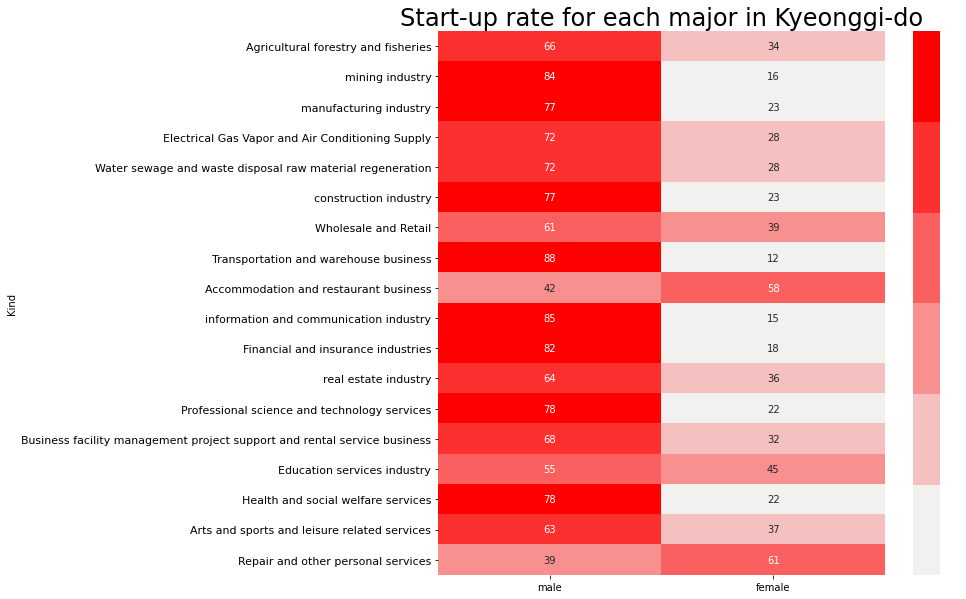

In [3]:
#히트맵 시각화
plt.rcParams['figure.figsize'] = [10, 10]
plt.title("Start-up rate for each major in Kyeonggi-do",fontsize=24)
plt.style.use(['dark_background'])
plt.yticks(fontsize=11)
sns.heatmap(business_data, annot=True, cmap=sns.light_palette('red')) 

### 1.6 대표자의 나이대별 성별 비율 시각화

- 히트맵으로 시각화함을 통해 현재 남성 창업자의 비율이 여성 창업자의 비율보다 현저히 높음을 볼 수 있다.
- 숙박 및 음식점업, 수리 및 기타 개인 서비스업 에서 여성 창업자의 비율이 높은 걸로 봐 
   이 두 분야를 여성 창업자가 선호함을 볼 수 있다.

In [4]:
# 나이대별 성별 비율 
age_dt = pd.read_csv("나이_성별.csv", index_col='Age')
age_dt

,Male,Female
Age,,
Those in their 20s,65.8,34.2
Thirties,58.8,41.2
Forties,59.4,40.6
Fifties,57.5,42.5
Over 60s,56.9,43.1


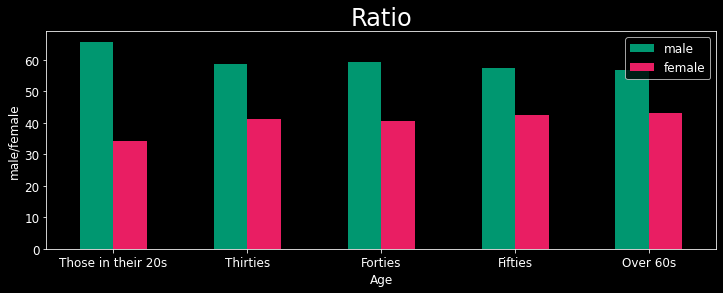

In [5]:
colors = ['#009770', '#E91E63']
age_plot = age_dt.plot(kind='bar', figsize=(12, 4), rot=0, legend=True, fontsize=12, color=colors)
plt.title("Ratio",fontsize=24)
age_plot.set_xlabel('Age', fontsize=12)          
age_plot.set_ylabel('male/female', fontsize=12)    
age_plot.legend(['male', 'female'], fontsize=12)    

### 1.7 남녀 창업자별 전공 비율 시각화

In [6]:
#창업한 인원에 대해 성별에 따른 전공 분야 비율
data_mm = pd.read_csv("전공별창업_male.csv", index_col='Major')
data_mf = pd.read_csv("전공별창업_female.csv", index_col='Major')

- humanities: 인문계열
- business: 상경계열
- education: 교육계열
- engineering: 공학계열
- natural series: 자연계열 
- medical science: 의학계열
- art and physical: 예체능계열
- humanities_high school: 인문계(고졸)
- industrial_high school: 실업계(고졸)
- art and physical_high school: 예체능(고졸)
- others: 나머지 계열 + 중졸이하

In [7]:
data_mm

,Male
Major,
humanities,18.3
business,6.4
education,2.3
engineering,14.5
natural series,3.7
medical science,2.1
art and physical,5.0
humanities_high school,16.0
industrial_high school,17.5


In [8]:
data_mf

,Female
Major,
humanities,17.0
business,6.6
education,1.8
engineering,10.6
natural series,2.9
medical science,1.2
art and physical,7.4
humanities_high school,19.3
industrial_high school,15.0


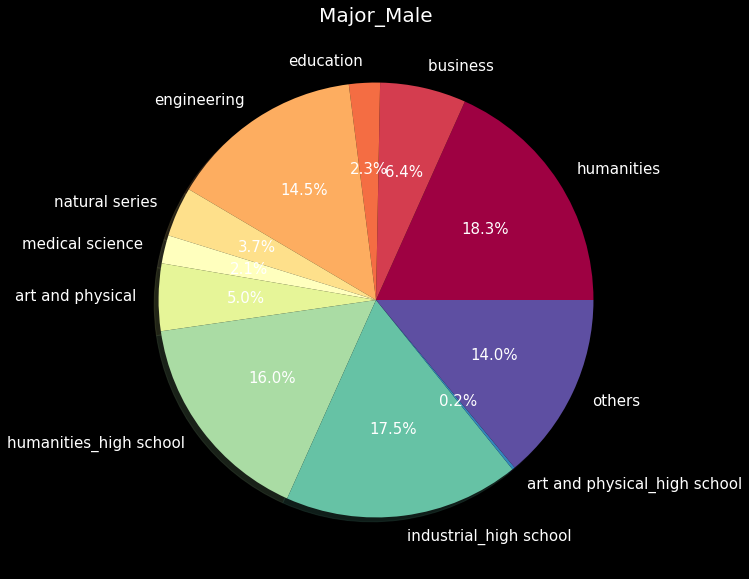

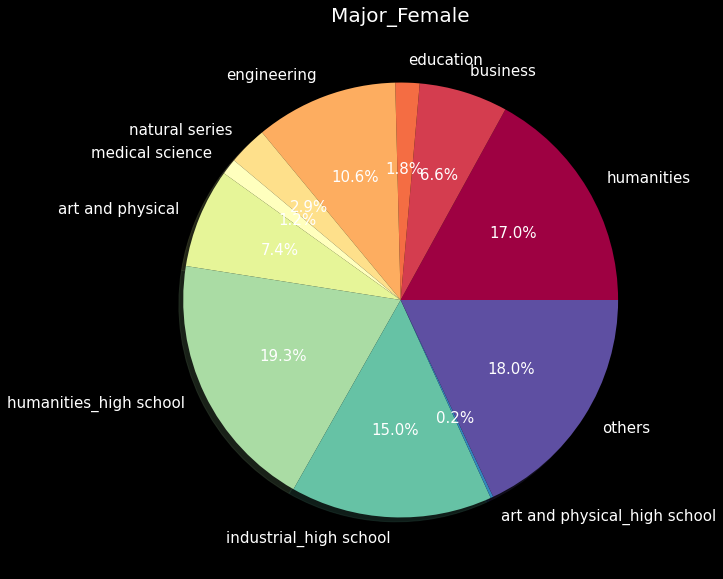

In [9]:
#파이차트로 나타낸 전공 분야 비율
plot_mm = data_mm.Male
plot_mf = data_mf.Female
categories1 = data_mm.index
categories2 = data_mf.index
c_map = plt.get_cmap('Spectral')
col = [c_map(i) for i in np.linspace(0, 1, 11)]
plt.pie(plot_mm, labels=list(categories1), autopct='%1.1f%%', shadow=True, colors = col,textprops={'fontsize': 15})
plt.title('Major_Male', fontsize=20)
plt.rcParams["figure.figsize"] = (30,10)
plt.show()
plt.pie(plot_mf, labels=list(categories2), autopct='%1.1f%%', shadow=True, colors = col,textprops={'fontsize': 15})
plt.title('Major_Female', fontsize=20)
plt.rcParams["figure.figsize"] = (30,10)
plt.show()